# Representacion del Cambio climático a través de extensión del hielo marino.

Todo el codigo creado por el alumno debe estar perfectamente comentado



## Cargar dataset en un dataframe.
Se debe cargar el dataset desde el drive del alumno y convertirlo a un dataframe que se llame df.

In [ ]:
# Importamos librerías
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Montamos y cargamos el fichero con los datos
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Notebooks/AA2_Materiales/SeaIce.txt'

df = pd.read_csv(path, sep=r'\s+')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


## Crear una nueva columna.
Se debe crear una nueva columna en el dataframe que represente la fecha a partir del mes y el año. El formato de la columna debe ser dd//mm/yy. El dataframe resultante se almacena en la variable df1.

In [ ]:
# Hacemos copia del dataframe original para no alterarlo
df1 = df.copy()

# Aseguramos que estamos trabajando con enteros
df1['year'] = df1['year'].astype(int)
df1['mo'] = df1['mo'].astype(int)

# Creamos la columna y ordenamos al formato deseado dd//mm//yy
df1['date'] = pd.to_datetime({'year': df1['year'], 'month': df1['mo'], 'day': 1})
df1['date'] = df1['date'].dt.strftime('%d/%m/%y')

df1.head()

,year,mo,data_type,region,extent,area,date
0,1979,1,Goddard,N,15.54,12.33,01/01/79
1,1980,1,Goddard,N,14.96,11.85,01/01/80
2,1981,1,Goddard,N,15.03,11.82,01/01/81
3,1982,1,Goddard,N,15.26,12.11,01/01/82
4,1983,1,Goddard,N,15.10,11.92,01/01/83


## Eliminación de columnas.
Se deden eliminar las columnas 'year' y	'mo' del dataframe df1 porque su información ya se encuentra incluida en la nueva columna fecha. El dataframe resultante se almacena en la variable df2.

In [ ]:
df2 = df1.drop(columns=['year', 'mo'])

df2.head()

,data_type,region,extent,area,date
0,Goddard,N,15.54,12.33,01/01/79
1,Goddard,N,14.96,11.85,01/01/80
2,Goddard,N,15.03,11.82,01/01/81
3,Goddard,N,15.26,12.11,01/01/82
4,Goddard,N,15.10,11.92,01/01/83


## Registros duplicados.
Encontrar si hay registros duplicados en el dataframe df2.

In [ ]:
duplicados = df2.duplicated()

if duplicados.any():
  print("Hay ", duplicados.sum(), " registros duplicados: \n", df2[duplicados])
else:
  print("No se han encontrado registros duplicados")

Hay  3  registros duplicados: 
    data_type region  extent   area      date
24   Goddard      N   14.45  12.19  01/01/02
40   Goddard      N   14.45  12.19  01/01/02
44   Goddard      N   14.45  12.19  01/01/02


### Eliminar registros duplicados.
Se debe eliminar los registros duplicados del dataframe df2 y generar un nuevo dataframe denominado df3.

In [ ]:
df3 = df2.drop_duplicates()

df3.head()

,data_type,region,extent,area,date
0,Goddard,N,15.54,12.33,01/01/79
1,Goddard,N,14.96,11.85,01/01/80
2,Goddard,N,15.03,11.82,01/01/81
3,Goddard,N,15.26,12.11,01/01/82
4,Goddard,N,15.10,11.92,01/01/83


## Encontrar outliers.
A través de la visualizacion de datos (el alumno debe elegir el mejor tipo gráfico) para la detección de los outliers del dataframe df3.

In [ ]:
# El formato de la fecha me estaba dando problemas, tuve que volverlo a cambiar a tipo datetime
df3 = df3.copy() # Cambio la direccion de memoria para poder trabajar con los datatypes
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%y', errors='coerce')

print(df3['date'].dtype)

datetime64[ns]


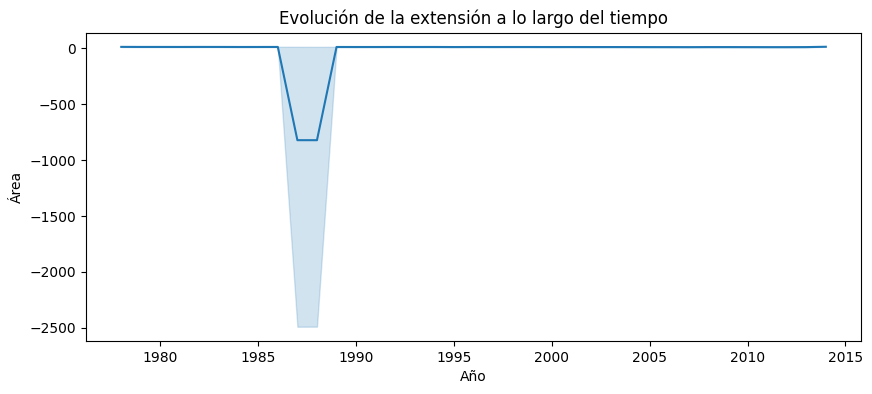

In [ ]:
# Visualizamos la variacion de extent
plt.figure(figsize=(10, 4))
sns.lineplot(x=df3['date'].dt.year, y='extent', data=df3)

# Mostramos el gráfico
plt.title('Evolución de la extensión a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Área')
plt.show()

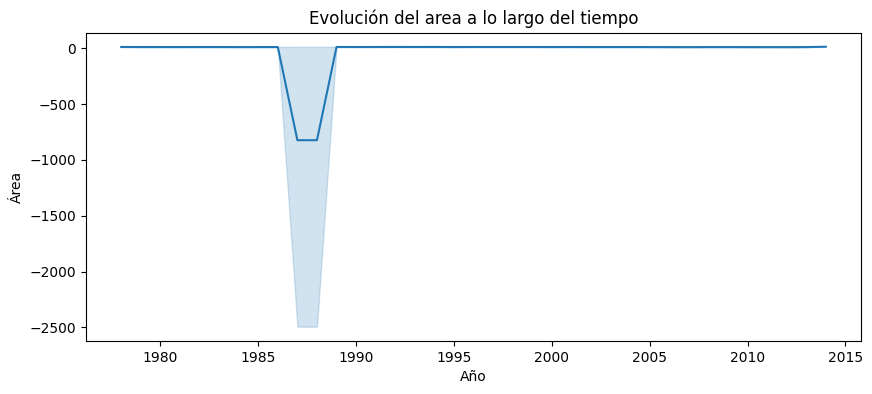

In [ ]:
# Comprobamos la variacion del área
plt.figure(figsize=(10, 4))
sns.lineplot(x=df3['date'].dt.year, y='area', data=df3)

# Mostramos el gráfico
plt.title('Evolución del area a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Área')
plt.show()

### Eliminar outliers.
Generar un nuevo dataframe eliminando las observaciones que tienen outliers del dataframe df3, se almacena como df4.

In [ ]:
# En la gráfica anterior podemos ver que hay datos exageradamente anómalos en 'area' y 'extent' entre 1985 y 1990
# Comprobamos qué registros son exactamente:
print('Errores de extent:\n', df3[df3['extent'] <= -500])
print('\nErrors de area:\n', df3[df3['area'] <= -500])

Errores de extent:
     data_type region  extent    area       date
9       -9999      N -9999.0 -9999.0 1988-01-01
400     -9999      N -9999.0 -9999.0 1987-12-01

Errors de area:
     data_type region  extent    area       date
9       -9999      N -9999.0 -9999.0 1988-01-01
400     -9999      N -9999.0 -9999.0 1987-12-01


In [ ]:
# Vemos que los errores tanto de extent como area son en los mismos registros (9 y 400)
# Procedemos a la eliminación de los outliers
#df4 = df3.drop(df3[(df3['extent'] >= -500)])
df4 = df3.copy()
df4 = df4[df4['extent'] >= -500].reset_index() # Eludimos los anomalos y reseteamos el índice
print(df4.head(), '\n')
# Comprobamos:
print('Errores de extent:\n', df4[df4['extent'] <= -500])

   index data_type region  extent   area       date
0      0   Goddard      N   15.54  12.33 1979-01-01
1      1   Goddard      N   14.96  11.85 1980-01-01
2      2   Goddard      N   15.03  11.82 1981-01-01
3      3   Goddard      N   15.26  12.11 1982-01-01
4      4   Goddard      N   15.10  11.92 1983-01-01 

Errores de extent:
 Empty DataFrame
Columns: [index, data_type, region, extent, area, date]
Index: []


### Sustituir valores outliers.
Generar un nuevo dataframe sustituyendo los valores atípicos por valores más típicos del dataframe df3, se almacena como df5.

In [ ]:
df5 = df3.copy()

# Volvemos a seleccionar los outliers pero esta vez los guardamos
atipicos_extent = (df5['extent'] < -500)
atipicos_area = (df5['area'] < -500)

df5.loc[atipicos_extent, 'extent'] = df5['extent'].median()
df5.loc[atipicos_area, 'area'] = df5['area'].median()

# Comprobamos:
if df5[df5['extent'] <= -500].empty:
  print('No hay errores.\n')
else:
  print('Errores de extent:\n', df5[df5['extent'] <= -500], '\n')
print('Valores corregidos de df3:\n', df5.iloc[[9, 400]])

No hay errores.

Valores corregidos de df3:
     data_type region  extent    area       date
9       -9999      N  12.385   9.895 1988-01-01
403   Goddard      N  13.270  11.400 1990-12-01


In [ ]:
# Corregimos el error que mantiene la fila 9 en data_type:
df5.loc[9, 'data_type'] = 'Goddard'
print(df5.iloc[9])

data_type                Goddard
region                         N
extent                    12.385
area                       9.895
date         1988-01-01 00:00:00
Name: 9, dtype: object


## Calcular valores descriptivos estadísticos.

Se calcula los datos estadísticos de cada mes del df4 y df5, valor medio, mediana, varianza, desviacion estandar y error estandar de la extensión de hielo y se almacena en el dataframe df_estadistica4 y df_estadistica5.
¿Existen diferencias notables entre ambos resultados estadísticos?

In [ ]:
# Inicialmente interpreté la pregunta de otra manera, cuya resolución queda en otra celda,
# la cual dejo por si efectivamente era la respuesta correcta en lugar de esta

# Extraemos el mes en otra columna para poder usarlo para agrupar los datos
df4['month'] = df4['date'].dt.month
df5['month'] = df5['date'].dt.month

# Calculamos los estadísticos con groupby
estadisticos_df4 = df4.groupby('month')['extent'].agg([
    'mean', 'median', 'var', 'std', 'sem'
]).reset_index()

estadisticos_df5 = df5.groupby('month')['extent'].agg([
    'mean', 'median', 'var', 'std', 'sem'
]).reset_index()

print("Estadísticos de df4 por mes:")
print(estadisticos_df4.round(2))

print("\nEstadísticos de df5 por mes:")
print(estadisticos_df5.round(2))

print('\nCONCLUSION: Efectivamente sí se puede ver una diferencia en los meses 1 y 12 (los que tenían los outliers), \n'
      'pero la diferencia es pequeña porque en el df4 se omitieron esos datos, y en el df5 se sustituyeron por otros similares')

Estadísticos de df4 por mes:
    month   mean  median   var   std   sem
0       1  14.48   14.47  0.30  0.55  0.09
1       2  15.30   15.34  0.30  0.54  0.09
2       3  15.49   15.50  0.24  0.49  0.08
3       4  14.77   14.70  0.22  0.46  0.08
4       5  13.40   13.32  0.19  0.44  0.07
5       6  11.86   11.91  0.25  0.50  0.08
6       7   9.60    9.62  0.68  0.82  0.14
7       8   7.12    7.38  0.82  0.91  0.15
8       9   6.40    6.55  1.14  1.07  0.18
9      10   8.81    8.92  0.63  0.79  0.13
10     11  10.96   10.98  0.41  0.64  0.11
11     12  13.06   13.17  0.28  0.53  0.09

Estadísticos de df5 por mes:
    month   mean  median   var   std   sem
0       1  14.42   14.46  0.42  0.65  0.11
1       2  15.30   15.34  0.30  0.54  0.09
2       3  15.49   15.50  0.24  0.49  0.08
3       4  14.77   14.70  0.22  0.46  0.08
4       5  13.40   13.32  0.19  0.44  0.07
5       6  11.86   11.91  0.25  0.50  0.08
6       7   9.60    9.62  0.68  0.82  0.14
7       8   7.12    7.38  0.82  0.91  

In [ ]:
# ¿Existen diferencias notables entre ambos resultados estadísticos?
# (Hice ésto antes del apartado anterior, antes de conocer "groupby")

df4_media_extension = df4['extent'].mean()
df4_mediana_extension = df4['extent'].median()
df4_varianza_extension = df4['extent'].var()
df4_desviacion_estandar_extension = df4['extent'].std()
df4_error_estandar_extension = df4['extent'].sem()

df5_media_extension = df5['extent'].mean()
df5_mediana_extension = df5['extent'].median()
df5_varianza_extension = df5['extent'].var()
df5_desviacion_estandar_extension = df5['extent'].std()
df5_error_estandar_extension = df5['extent'].sem()

# Creamos un diccionario para df4 y df5:
estadisticos = {
    'df4': {
        'df4_media_extension':df4_media_extension,
        'df4_mediana_extension':df4_mediana_extension,
        'df4_varianza_extension':df4_varianza_extension,
        'df4_desviacion_estandar_extension':df4_desviacion_estandar_extension,
        'df4_error_estandar_extension':df4_error_estandar_extension
    },
    'df5': {
        'df5_media_extension':df5_media_extension,
        'df5_mediana_extension':df5_mediana_extension,
        'df5_varianza_extension':df5_varianza_extension,
        'df5_desviacion_estandar_extension':df5_desviacion_estandar_extension,
        'df5_error_estandar_extension':df5_error_estandar_extension
    }
}

# Mostramos para poder comparar ambos df:
print("Estadísticos de df4:")
for key, value in estadisticos['df4'].items():
    print(f"{key}: {round(value, 2)}")

print("\nEstadísticos de df5:")
for key, value in estadisticos['df5'].items():
    print(f"{key}: {round(value, 2)}")

print('\n¿Existen diferencias notables entre ambos resultados estadísticos?')
print('\nCONCLUSION: no hay grandes diferencias en la media ni la mediana, pero si se aprecia un cambio en la varianza y la \n'
      'desviación estándar, debido al valor tan extremo que tenían las tuplas con los outliers que claramente eran errores \n'
      'de medición')

Estadísticos de df4:
df4_media_extension: 11.78
df4_mediana_extension: 12.39
df4_varianza_extension: 9.74
df4_desviacion_estandar_extension: 3.12
df4_error_estandar_extension: 0.15

Estadísticos de df5:
df5_media_extension: 11.78
df5_mediana_extension: 12.39
df5_varianza_extension: 9.69
df5_desviacion_estandar_extension: 3.11
df5_error_estandar_extension: 0.15

¿Existen diferencias notables entre ambos resultados estadísticos?

CONCLUSION: no hay grandes diferencias en la media ni la mediana, pero si se aprecia un cambio en la varianza y la 
desviación estándar, debido al valor tan extremo que tenían las tuplas con los outliers que claramente eran errores 
de medición


### Representa la media mensual de la extension de hielo con el intervalo de confianza

Calcular el intervalo de confianza partiendo de un nivel de confianza del 95%

In [ ]:
# Nivel de confianza 95%, Z = 1.96
z_alpha_2 = 1.96

# Función para calcular el intervalo de confianza por mes (mean + (1,96 * (std/sqrt(sem))))
def calcular_ic(df):
    # Creamos una nueva columna para el intervalo de confianza
    df['ic_inf'] = df['mean'] - z_alpha_2 * (df['std'] / np.sqrt(df['sem']))
    df['ic_sup'] = df['mean'] + z_alpha_2 * (df['std'] / np.sqrt(df['sem']))
    return df

# Calculamos el intervalo de confianza para df4 y df5
ic_df4 = calcular_ic(estadisticos_df4)
ic_df5 = calcular_ic(estadisticos_df5)

# Imprimimos los resultados
print("Intervalos de confianza para df4 por mes:")
print(ic_df4[['month', 'ic_inf', 'ic_sup']].round(4))

print("\nIntervalos de confianza para df5 por mes:")
print(ic_df5[['month', 'ic_inf', 'ic_sup']].round(4))

# Conclusión:
print('\nCONCLUSION: El intervalo de los meses 1 y 12 (los que varían entre ambos df) es más estrecho en df4, por lo que \n'
      'podemos interpretar que hemos hecho un mejor trabajo eliminando los datos anómalos que sustituyendolos por su media.')

Intervalos de confianza para df4 por mes:
    month   ic_inf   ic_sup
0       1  10.9369  18.0220
1       2  11.7582  18.8395
2       3  12.1647  18.8187
3       4  11.5183  18.0137
4       5  10.2489  16.5431
5       6   8.4960  15.2240
6       7   5.2733  13.9290
7       8   2.5794  11.6652
8       9   1.4746  11.3351
9      10   4.5613  13.0570
10     11   7.1171  14.8123
11     12   9.5766  16.5423

Intervalos de confianza para df5 por mes:
    month   ic_inf   ic_sup
0       1  10.5608  18.2817
1       2  11.7582  18.8395
2       3  12.1647  18.8187
3       4  11.5183  18.0137
4       5  10.2489  16.5431
5       6   8.4960  15.2240
6       7   5.2733  13.9290
7       8   2.5794  11.6652
8       9   1.4746  11.3351
9      10   4.5613  13.0570
10     11   7.1171  14.8123
11     12   9.5195  16.5619

CONCLUSION: El intervalo de los meses 1 y 12 (los que varían entre ambos df) es más estrecho en df4, por lo que 
podemos interpretar que hemos hecho un mejor trabajo eliminando los datos

### Representar un gráfico por mes de la extension de hielo.

Representar un grafico de cada mes (12 gráficos) donde se representa en el eje x los años de las observaciones y en el eje y la extension media del hielo. En este gráfico tambien se deben representar la media del mes y los intervalos de confianza.
¿Se puede concluir que el cambio en la extension del hielo es estadisticamente significativo?

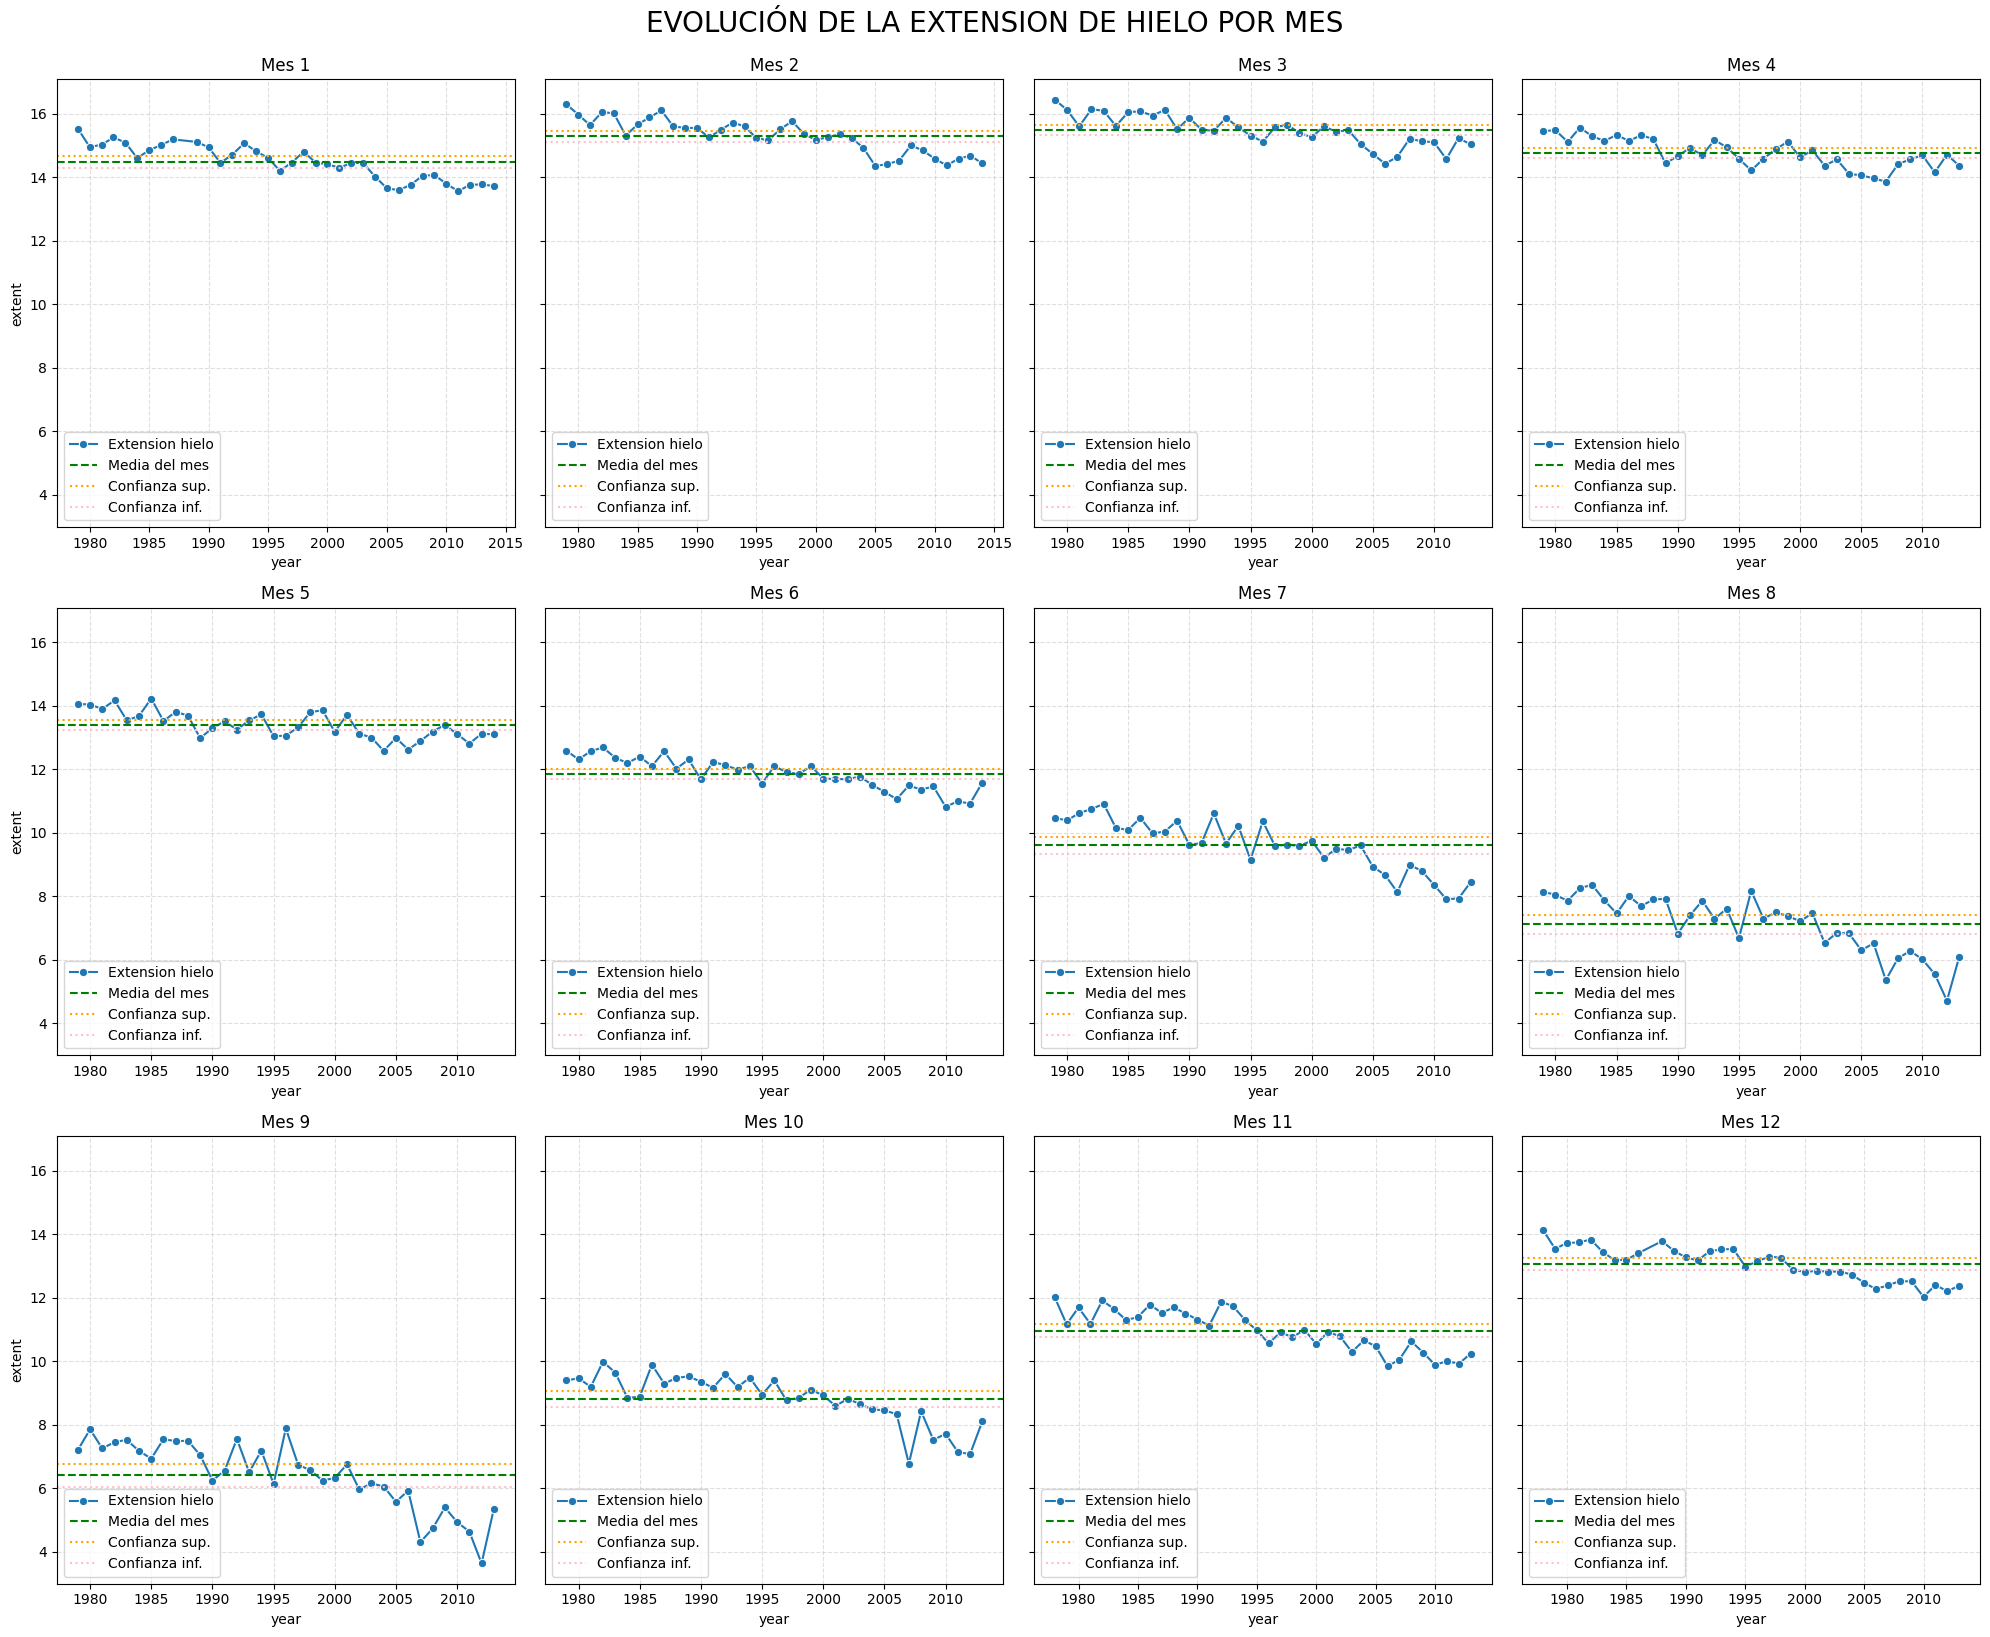

In [ ]:
# Usaremos df4 por contener datos más precisos (conclusión celda)

# Nueva columna 'year'
df4['year'] = df4['date'].dt.year

fig, axs = plt.subplots(3, 4, figsize=(20, 16), sharey=True)
axs = axs.flatten()

z = 1.96

for mes in range(1, 13):
    ax = axs[mes - 1]

    # Filtrar los datos del mes
    datos_mes = df4[df4['month'] == mes]

    # Agrupar por año y calcular la media anual para ese mes
    datos_agrupados = datos_mes.groupby('year')['extent'].mean().reset_index()

    # Estadísticos por mes (los calculo de nuevo para evitar errores)
    media_mes = datos_mes['extent'].mean()
    std_mes = datos_mes['extent'].std()
    n_mes = datos_mes['year'].nunique()
    error = z * std_mes / np.sqrt(n_mes)
    ic_inf = media_mes - error
    ic_sup = media_mes + error

    # Gráficas
    sns.lineplot(data=datos_agrupados, x='year', y='extent', ax=ax, marker='o', label='Extension hielo')
    ax.axhline(media_mes, color='green', linestyle='--', label='Media del mes')
    ax.axhline(ic_sup, color='orange', linestyle=':', label='Confianza sup.')
    ax.axhline(ic_inf, color='pink', linestyle=':', label='Confianza inf.')

    ax.set_title(f'Mes {mes}')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='lower left')

plt.tight_layout()
plt.suptitle('EVOLUCIÓN DE LA EXTENSION DE HIELO POR MES', fontsize=20, y=1.02)
plt.show()


# **CONCLUSIÓN**
En la gráfica pueden apreciarse 2 cambios a lo largo del tiempo, el cambio de extensión estacional y el que se ha estado dando a lo largo de los años:

- Cambios estacionales: Claramente, son los más significativos, ya que a lo largo del año pasan de hasta 17 puntos como máximo histórico a 2 como mínimo (la diferencia por año ronda los 9 puntos aproximadamente).

- Cambios a lo largo de los años: Se puede ver que a diferencia de los estacionales, también existe un cambio, pero éste no parece ser tan dramático, pudiendose apreciar una bajada de 2 puntos en invierno, y de 3~4 puntos en los veranos, durante los últimos 36 años. A priori no resulta muy relevante, pero conociendo los datos es muy probable que dentro de otros 36 años haya días en Agosto o Septiembre donde la extensión de hielo llegue a 0, lo cual sí podría preocupar a más de uno.


Aún sabiendo que se trata de hielo marino en algún lugar del casquete del norte geológico, desconozco las unidades de la extensión, del área y de la naturaleza o localización de la masa de hielo a nivel general, por lo que no puedo sacar conclusiones más allá de que la tendencia de aquí a unas décadas parece ser la desaparición del hielo durante los meses de verano, lo cual, dependiendo de la localización, podría dar facilidades al comercio marítimo o a las actividades de pesca.